# Read data from CCSM4 simulation

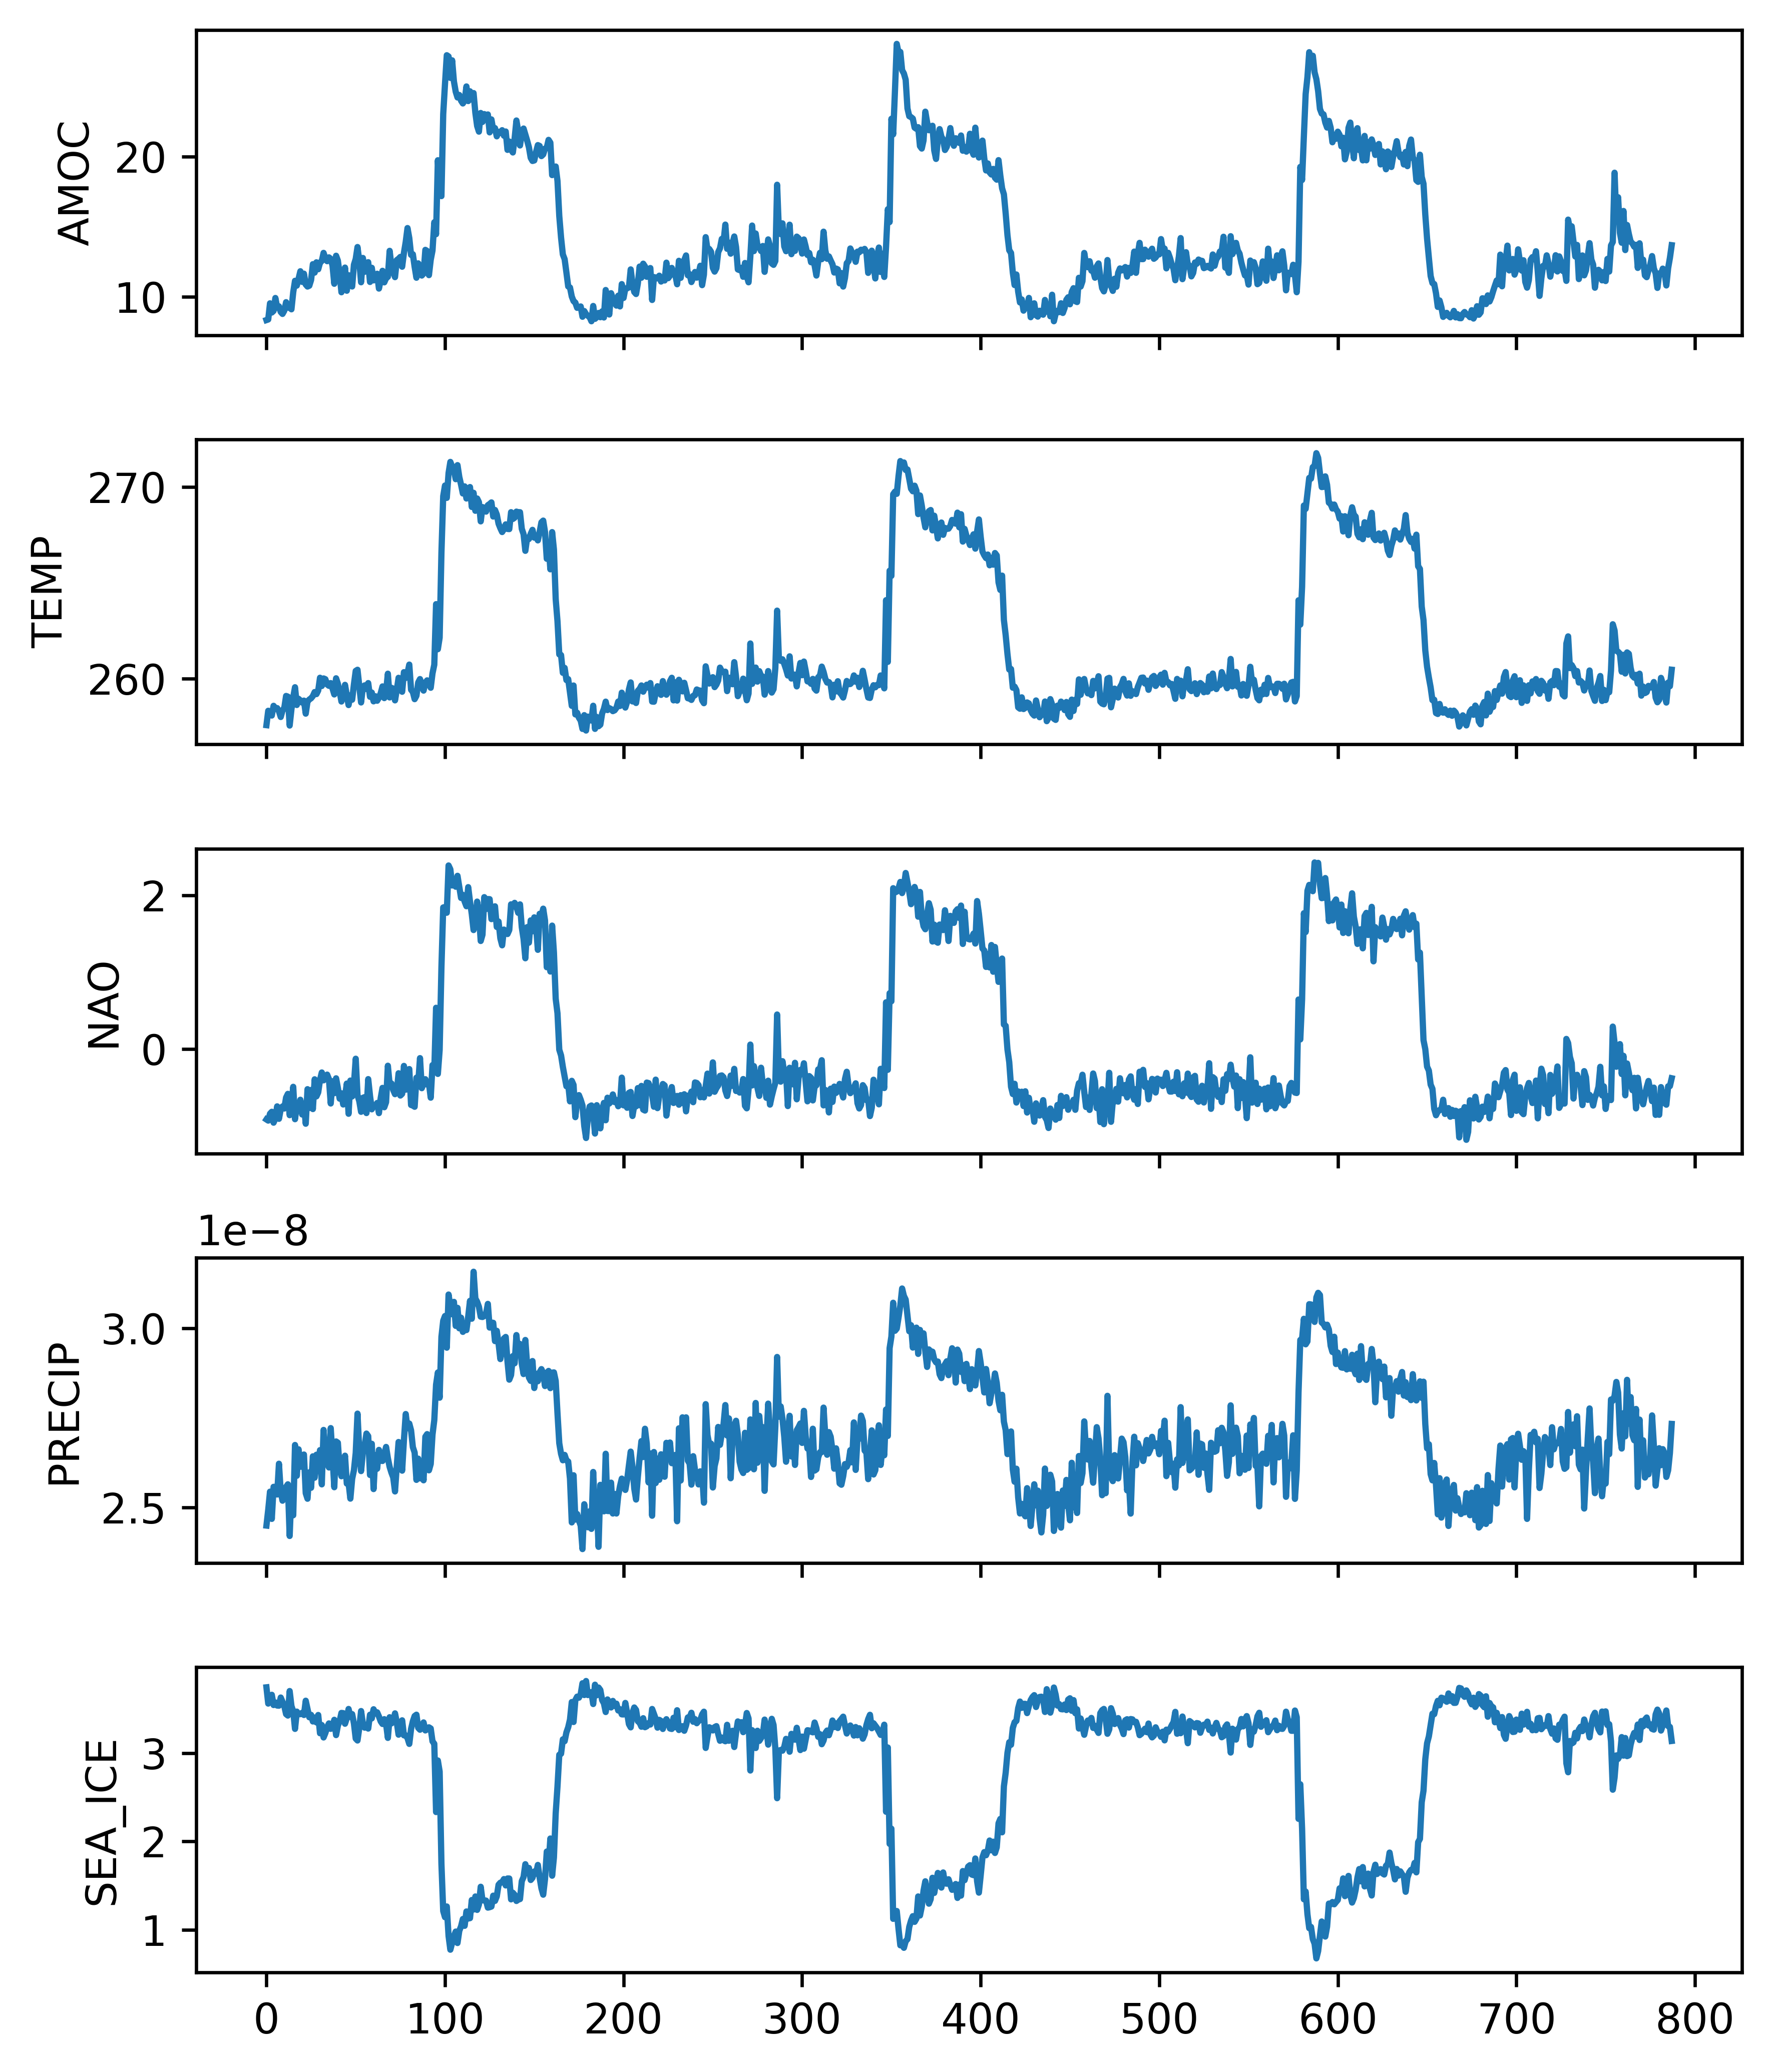

In [1]:

import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')
NAO = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/NAO/200.npy')
PRECIP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/PRECIP/200.npy')
SEA_ICE = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/SEA_ICE/200.npy')

# plot the data in 5 subplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(6, 7), sharex=True, dpi=600)
ax[0].plot(AMOC)
ax[0].set_ylabel('AMOC')
ax[1].plot(TEMP)
ax[1].set_ylabel('TEMP')
ax[2].plot(NAO)
ax[2].set_ylabel('NAO')
ax[3].plot(PRECIP)
ax[3].set_ylabel('PRECIP')
ax[4].plot(SEA_ICE)
ax[4].set_ylabel('SEA_ICE')
plt.tight_layout()

plt.show()


# DO the GC for all variables

In [2]:
import pandas as pd
df_all_vars= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE})
df_all_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     788 non-null    float32
 1   TEMP     788 non-null    float64
 2   NAO      788 non-null    float32
 3   PRECIP   788 non-null    float64
 4   SEA_ICE  788 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 21.7 KB


# Test stationarity

In [3]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

for column in df_all_vars.columns:
    is_stationary = GC.is_stationary(df_all_vars[column])
    print(f'The stationarity of {column} is {is_stationary}.')
    

ADF Statistic: -3.7096947545219248
p-value: 0.003978836932458214
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
The stationarity of AMOC is True.
ADF Statistic: -3.3974027018716826
p-value: 0.011047732625409486
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
The stationarity of TEMP is True.
ADF Statistic: -3.2155467312269317
p-value: 0.01910222677259847
Critical Values:
	1%: -3.438750669890019
	5%: -2.8652477937238703
	10%: -2.56874438754281
The series is stationary.
The stationarity of NAO is True.
ADF Statistic: -3.400942553356252
p-value: 0.010926781966024176
Critical Values:
	1%: -3.4387184182983686
	5%: -2.865233578638179
	10%: -2.5687368149338816
The series is stationary.
The stationarity of PRECIP is True.
ADF Statistic: -3.5920188506174617
p-value: 0.00591545620014903
Critical Values:
	1%: -3.438750669890019
	5%: -2.8652477937238703
	10

# Calculating the AIC

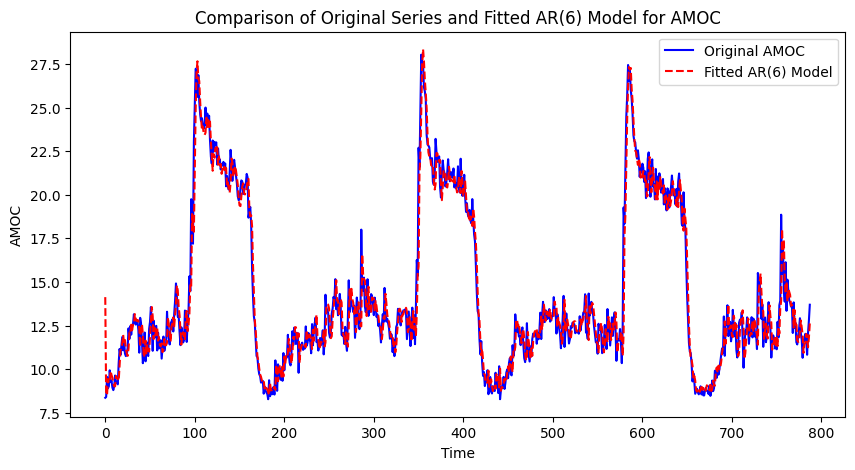

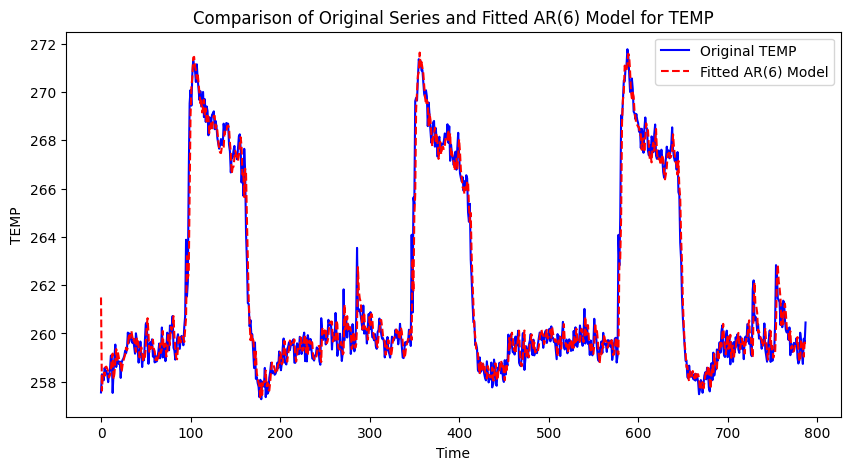

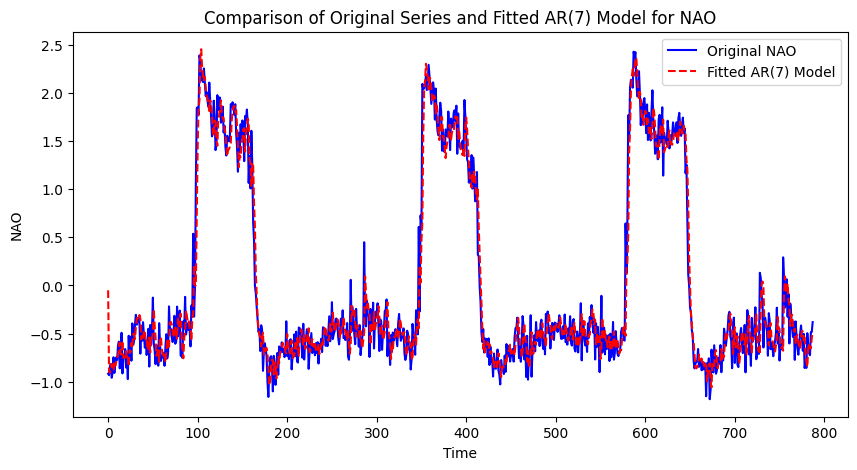

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\statsmodels\

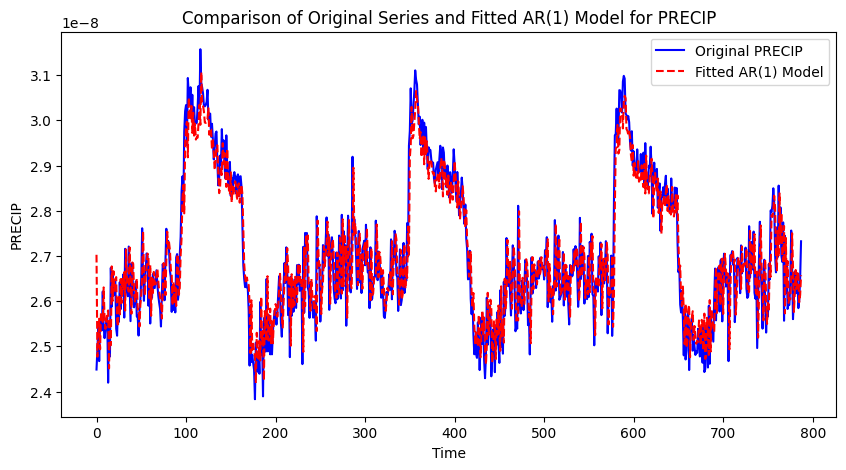

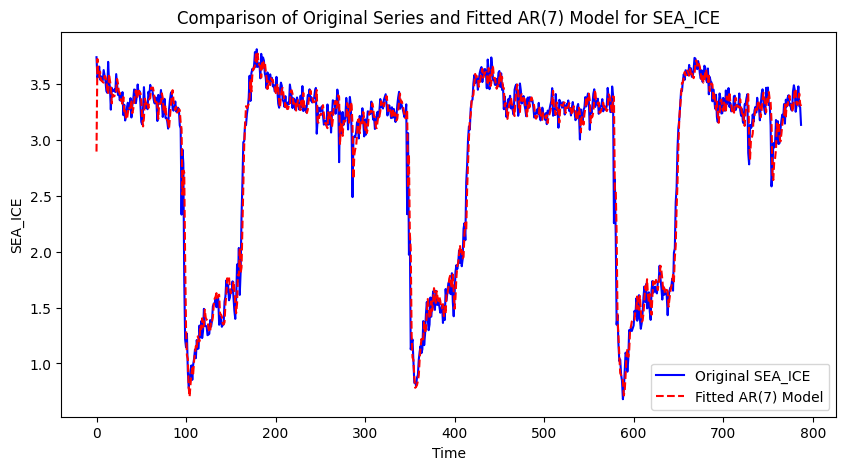

{'AMOC': {'Optimal Order': 6, 'AIC': 2334.5709282759353}, 'TEMP': {'Optimal Order': 6, 'AIC': 1752.668925508056}, 'NAO': {'Optimal Order': 7, 'AIC': -24.844018857657346}, 'PRECIP': {'Optimal Order': 1, 'AIC': -16688.566009059512}, 'SEA_ICE': {'Optimal Order': 7, 'AIC': -702.1490442066189}}


In [63]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)


results = GC.find_optimal_ar_order(df_all_vars, show_figures=True)
print(results)


# Do the GC

In [4]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

gc_results = GC.gc4vars(df_all_vars, max_lags=10)
print(gc_results)


Testing causality between: AMOC and TEMP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    63.727               0.000                5                True
TEMP => AMOC    30.494               0.000                1                True

Testing causality between: AMOC and NAO
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => NAO    49.921               0.000                5                True
NAO => AMOC    119.972               0.000                1                True

Testing causality between: AMOC and PRECIP


c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => PRECIP    3.762               0.000                9                True
PRECIP => AMOC    231.894               0.000                1                True

Testing causality between: AMOC and SEA_ICE
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => SEA_ICE    72.901               0.000                5                True
SEA_ICE => AMOC    33.032               0.000                1                True

Testing causality between: TEMP and NAO
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
TEMP => NAO    1.947               0.121                3  

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
TEMP => SEA_ICE    21.038               0.000                1                True
SEA_ICE => TEMP    1.758               0.065                10                False

Testing causality between: NAO and PRECIP
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
NAO => PRECIP    56.822               0.000                1                True
PRECIP => NAO    178.516               0.000                1                True

Testing causality between: NAO and SEA_ICE
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
NAO => SEA_ICE    188.503               0.000             

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [5]:
# store the gc_results
import pickle
with open('gc_results.pkl', 'wb') as f:
    pickle.dump(gc_results, f)

In [6]:
# load the gc_results
import pickle
with open('gc_results.pkl', 'rb') as f:
    gc_results = pickle.load(f)

# Plot the causal graph

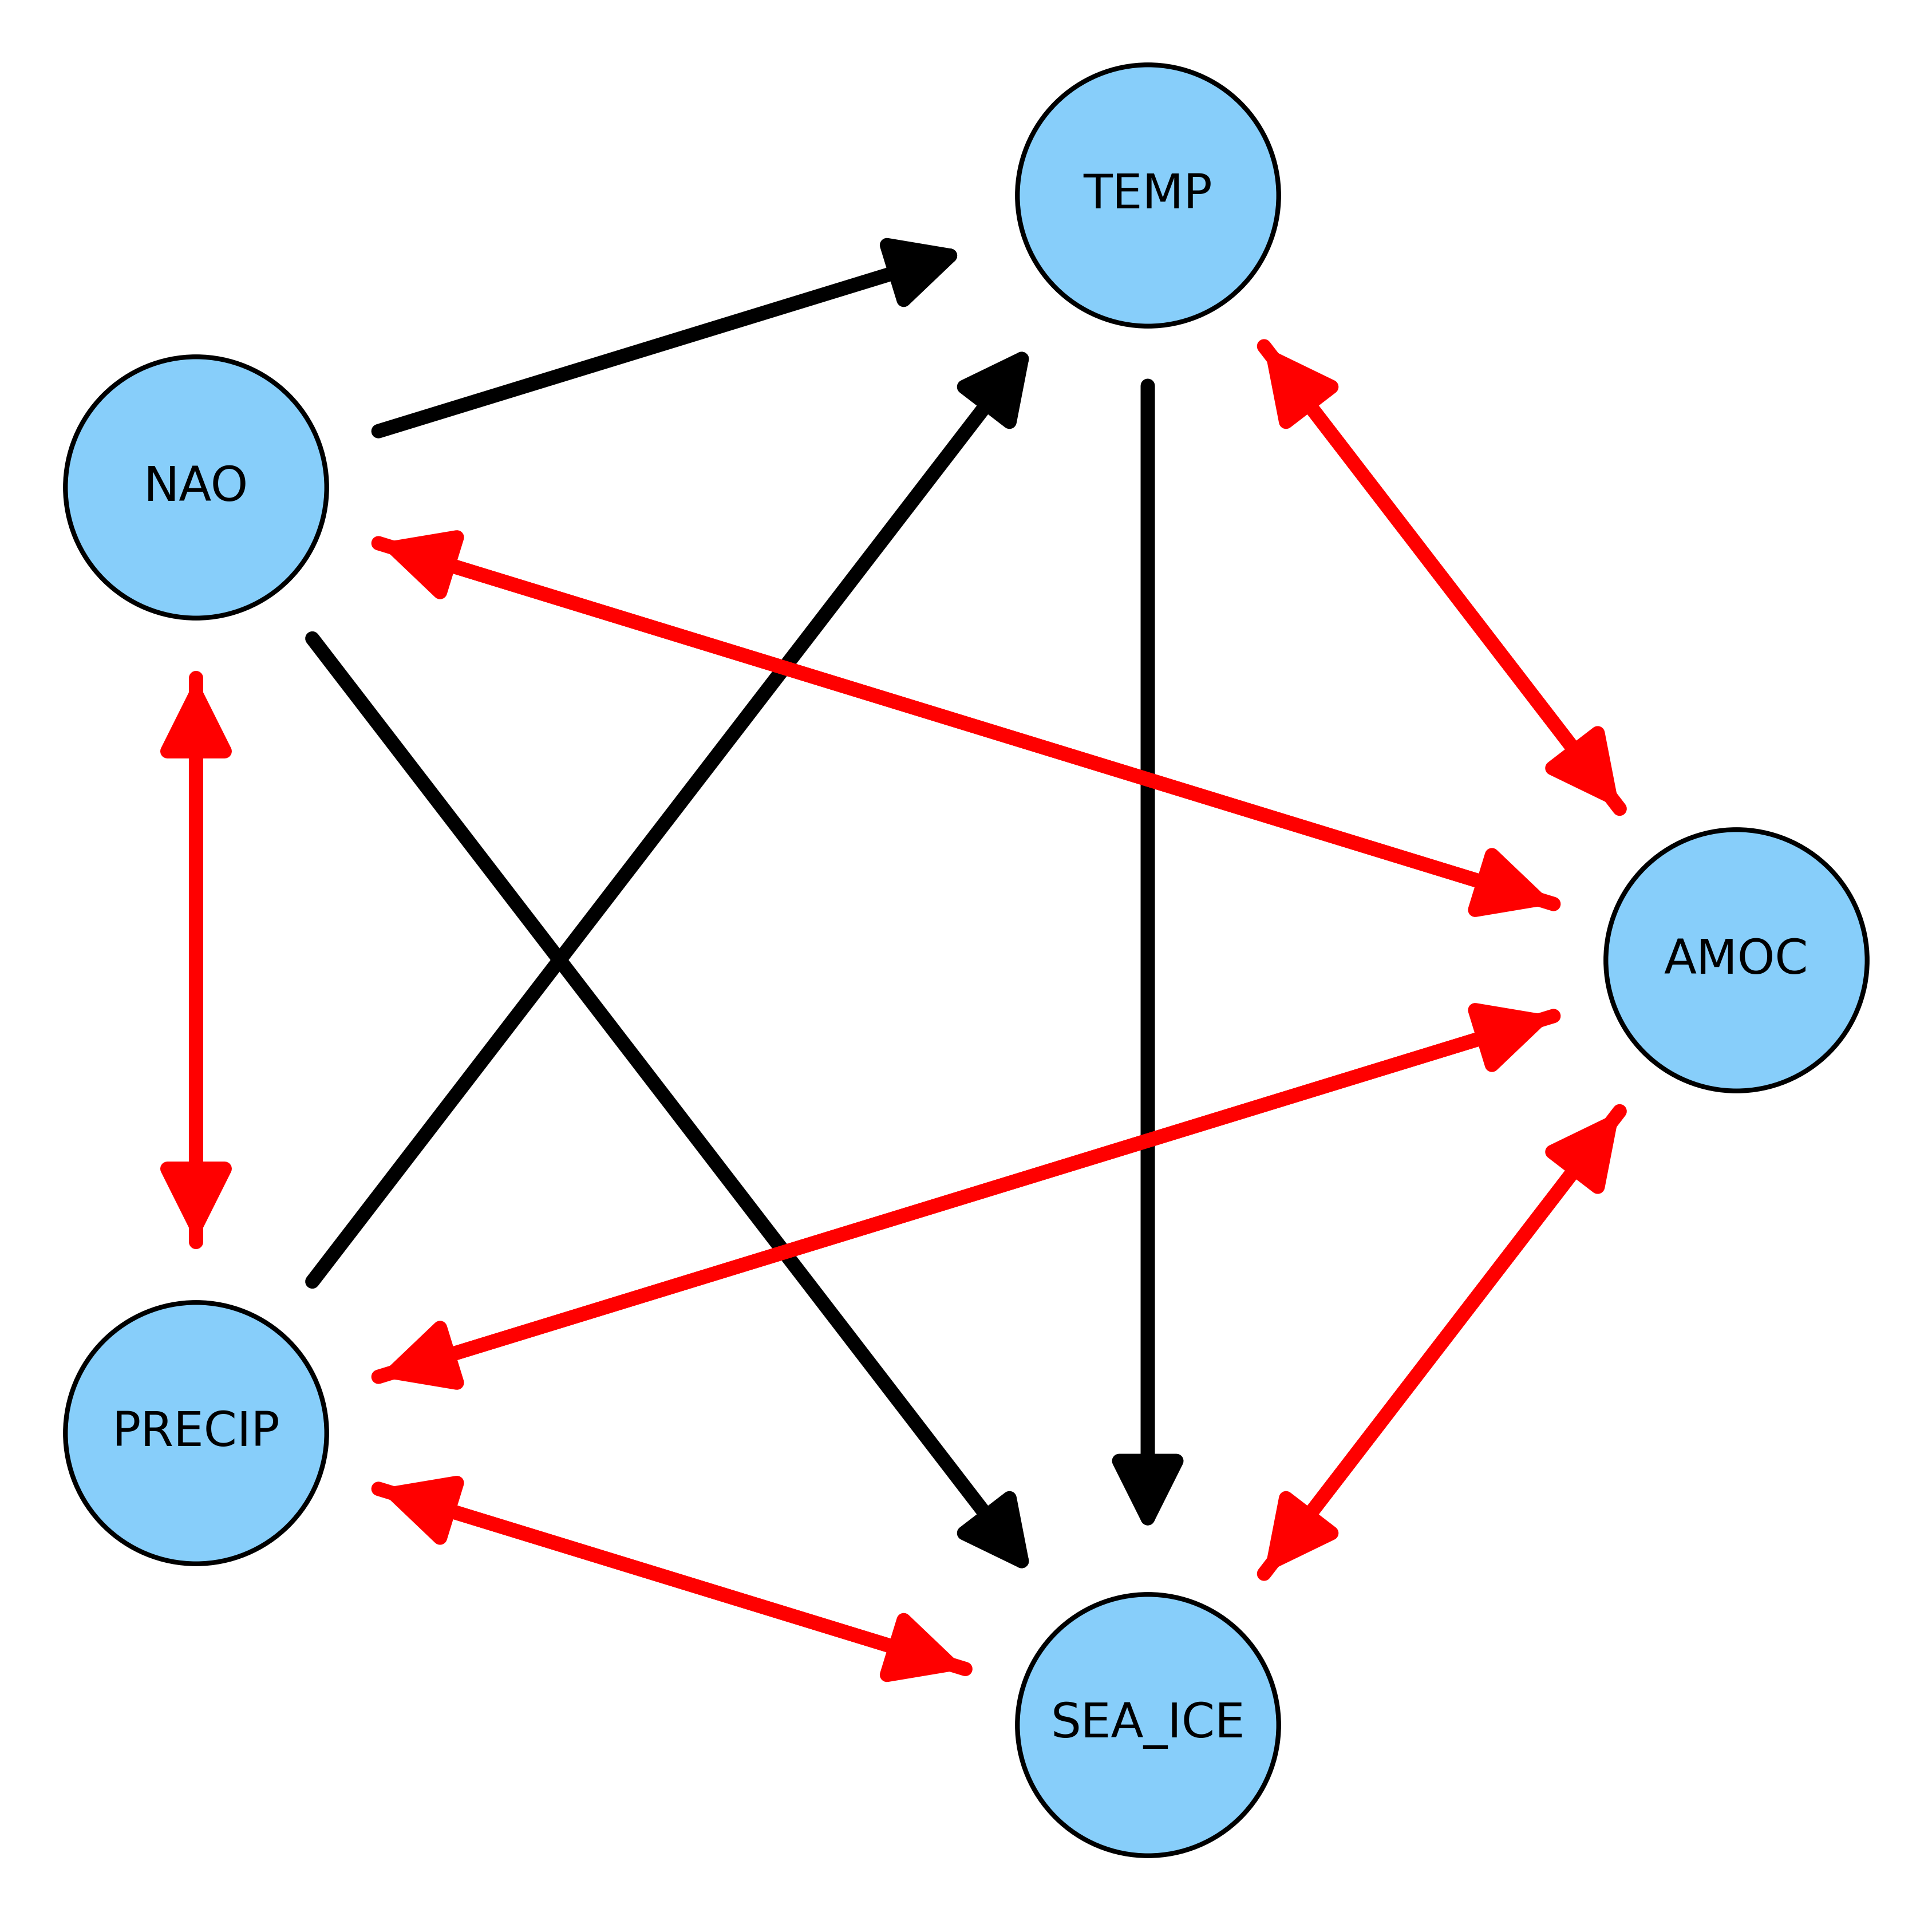

In [8]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

GC.plot_causal_graph(gc_results, variables=['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE'])


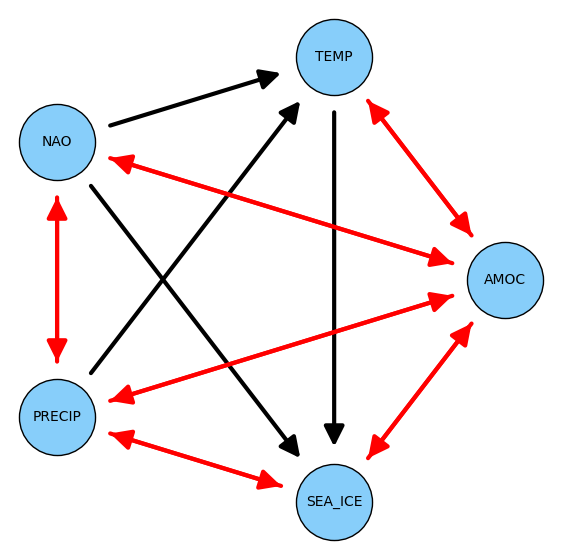

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (unique variables)
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
for var in variables:
    G.add_node(var)


# Storage for edges to draw them with specific styles later
edges_uni = []
edges_bi = []

# Iterate over the stored results to categorize edges
for result in gc_results:
    column_x, column_y = result['variables']
    if result['XY'] and result['YX']:  # If causality is bidirectional
        edges_bi.append((column_x, column_y))
        edges_bi.append((column_y, column_x))
    else:
        if result['XY']:  # If X causes Y
            edges_uni.append((column_x, column_y))
        if result['YX']:  # If Y causes X
            edges_uni.append((column_y, column_x))

for column_x, column_y in edges_uni:
    # For unidirectional edges, add them to the graph with a default color (black) and strength
    G.add_edge(column_x, column_y, strength=1, color='black')

for column_x, column_y in edges_bi:
    # For bidirectional edges, you might add them twice with different colors or just keep them black
    # This part is more about how you want to visually differentiate them
    G.add_edge(column_x, column_y, strength=1, color='red')

    
# pos = nx.spring_layout(G)  # Generate a spring layout
pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.spiral_layout(G)


plt.figure(figsize=(7, 7),dpi=100)  # Set the size of the figure

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, edgecolors='black', node_color='lightskyblue', linewidths=1, alpha=1)


# Draw the edges with a slight arc, which can create the visual effect of space
nx.draw_networkx_edges(G, pos, edgelist=edges_uni, edge_color='black', arrows=True, width=3, arrowsize=30,
                       min_source_margin=40,min_target_margin=40)  # Adjust `rad` value as needed
nx.draw_networkx_edges(G, pos, edgelist=edges_bi, edge_color='red', arrows=True, width=3, arrowsize=30,
                       min_source_margin=40,min_target_margin=40)  # Adjust `rad` value as needed

# Labels for the nodes
nx.draw_networkx_labels(G, pos, font_size=10)

plt.axis('off')  # Turn off the axis
plt.show()  # Display the graph


In [10]:
import networkx as nx
import gravis as gv

# Create a directed graph
G = nx.DiGraph()

# Add nodes (unique variables)
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
for var in variables:
    G.add_node(var)

# Storage for edges to draw them with specific styles later
edges_uni = []
edges_bi = []

# Iterate over the stored results to categorize edges
for result in gc_results:
    column_x, column_y = result['variables']
    if result['XY'] and result['YX']:  # If causality is bidirectional
        edges_bi.append((column_x, column_y))
        edges_bi.append((column_y, column_x))
    else:
        if result['XY']:  # If X causes Y
            edges_uni.append((column_x, column_y))
        if result['YX']:  # If Y causes X
            edges_uni.append((column_y, column_x))

for column_x, column_y in edges_uni:
    # For unidirectional edges, add them to the graph with a default color (black) and strength
    G.add_edge(column_x, column_y, strength=1, color='black')

for column_x, column_y in edges_bi:
    # For bidirectional edges, you might add them twice with different colors or just keep them black
    # This part is more about how you want to visually differentiate them
    G.add_edge(column_x, column_y, strength=1, color='red')

# Use gravis to display the graph
# Assuming strength is used as edge label and you want to show it
fig = gv.d3(G, show_edge_label=False, edge_label_data_source='strength',zoom_factor=5,node_size_factor=0.7,node_label_size_factor=0.5,
            show_node_label_border=True)
fig.display()  # This should display the graph using gravis


In [28]:
import networkx as nx
import gravis as gv

edges = [
    ('A', 'B', 1, 'black'),
    ('B', 'C', 3, 'black'),
    ('B', 'D', 2, 'black'),
    ('B', 'E', 1, 'black'),
    ('C', 'D', 1, 'red'),
    ('C', 'E', 4, 'black'),
    ('D', 'A', 2, 'red'),
    ('D', 'E', 2, 'black'),
    ('E', 'F', 3, 'black'),
    ('G', 'D', 1, 'black'),
]
g = nx.DiGraph()
for source, target, strength, color in edges:
    g.add_edge(source, target, strength=strength, color=color)

fig = gv.d3(g, show_edge_label=True, edge_label_data_source='strength')
fig.display()  # opens the plot in a browser window, can be stored as SVG/JPG/PNG

# Do the GC test for the full dataset

In [ ]:
# create a new dataframes with the AMOC and TEMP data
import pandas as pd
df_test= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP})
df_test.head()

,AMOC,TEMP
0,8.355966,257.558837
1,8.399309,258.309436
2,9.550444,258.275294
3,8.893155,258.060596
4,9.010707,258.569338


In [ ]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_test_copy = GC.make_stationary(df_test, ['AMOC', 'TEMP'], plot=True)

result=GC.gc_test(df_test_copy, 'AMOC', 'TEMP', 50)

ADF Statistic: -3.709694754521928
p-value: 0.003978836932458161
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
Series in column 'AMOC' is stationary after 0 differencing operation(s).
ADF Statistic: -3.397402701871658
p-value: 0.011047732625410343
Critical Values:
	1%: -3.4387398917732193
	5%: -2.8652430432199654
	10%: -2.5687418568690683
The series is stationary.
Series in column 'TEMP' is stationary after 0 differencing operation(s).
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    63.727               0.000                5                True
TEMP => AMOC    30.494               0.000                1                True



# Crop a DO warming event and do the GC

ADF Statistic: -1.299813680420145
p-value: 0.6292575508042038
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.


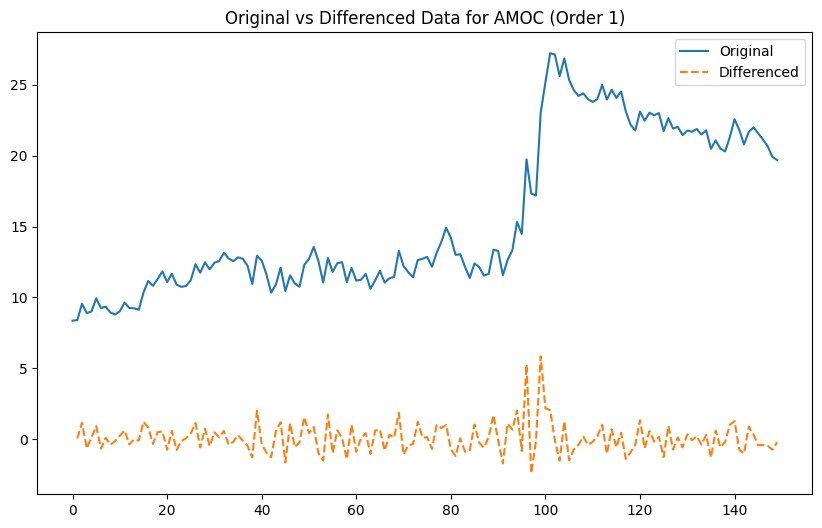

ADF Statistic: -14.249225471191762
p-value: 1.4910220399082335e-26
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is stationary.
Series in column 'AMOC' is stationary after 1 differencing operation(s).
ADF Statistic: -1.2819465955303737
p-value: 0.6373907663613377
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.


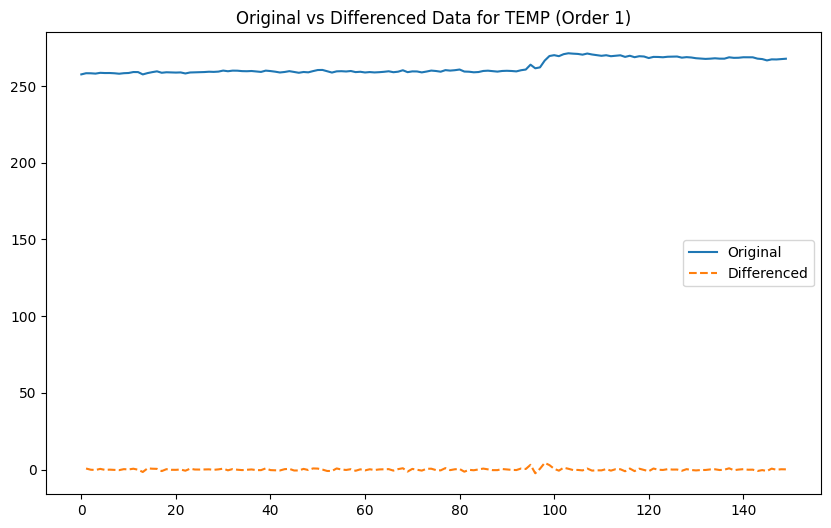

ADF Statistic: -3.7000932514399376
p-value: 0.004111842665085287
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is stationary.
Series in column 'TEMP' is stationary after 1 differencing operation(s).
Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
AMOC => TEMP    34.203               0.000                2                True
TEMP => AMOC    2.753               0.045                3                True



In [ ]:
# crop the AMOC and TEMP data from the first 150 values and create a new dataframe
df_test_crop = df_test.iloc[:150]


import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_test_crop_copy = GC.make_stationary(df_test_crop, ['AMOC', 'TEMP'], plot=True)

result=GC.gc_test(df_test_crop_copy, 'AMOC', 'TEMP', 20)